In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the data
analytics_data = pd.read_json('lastcallstudios-c8991-default-rtdb-export.json')

# Display the first few rows of the dataframe
df_head = analytics_data.head()
df_head

,analytics,analytics_v2,analytics_v3,analytics_v4,analytics_v5
01d28a36-ae56-487f-abc0-7008d17e3b82,"{'ballsKnockedOff': 5, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN
026ff44b-3a11-4fb0-a977-c072a67d1a2e,"{'ballsKnockedOff': 6, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN
050ee2d2-dd9d-4925-afd6-8b8fe93601c8,"{'ballsKnockedOff': 4, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN
068083c9-e93e-4c48-b801-62574e291227,"{'ballsKnockedOff': 2, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN
06c0f29f-c518-4cbd-a91f-cd81875f3b7d,"{'ballsKnockedOff': 0, 'bulletCollisions': 0, ...",NaN,NaN,NaN,NaN


In [6]:
# Convert the lists into dictionaries
analytics_data['analytics_v5'] = analytics_data['analytics_v5'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Flatten the nested data
flattened_data = pd.json_normalize(analytics_data['analytics_v5'])

# Print the head of the flattened dataframe
flattened_data.head()

,DirectionX,DirectionY,IsGhost,PositionX,PositionY,PositionZ,VelocityX,VelocityY,ballsKnockedByGhost,ballsKnockedByPlayer,...,shotsTaken,timeStarted,timeTaken,timeUpdated,totalScore,curvedShotsTaken,ghostBallGhostCollisions,ghostBallPlayerCollisions,curvedShotsUtilizedByGhost,curvedShotsUtilizedByPlayer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Convert the 'ballsPerPocket' column into a dataframe
balls_per_pocket_df = flattened_data['ballsPerPocket'].apply(pd.Series)

# Calculate the total number of balls per pocket
balls_per_pocket_df['total_balls'] = balls_per_pocket_df.sum(axis=1)

# Fill NA values with -1
flattened_data['currentLevel'].fillna(-1, inplace=True)

# Convert the 'currentLevel' column into integers
flattened_data['currentLevel'] = flattened_data['currentLevel'].astype(int)

# Calculate the average number of balls per pocket for each level
average_balls_per_level = balls_per_pocket_df.groupby(flattened_data['currentLevel'])['total_balls'].mean()

In [8]:
# Split the 'ballsPerPocket' column into individual pockets
balls_per_pocket_df = balls_per_pocket_df.rename(columns=lambda x: f'pocket_{x+1}' if isinstance(x, int) else x)

# Group by 'currentLevel' and calculate the sum of balls in each pocket
balls_per_pocket_per_level = balls_per_pocket_df.groupby(flattened_data['currentLevel']).sum()

In [9]:
# Select only pockets 1, 2, and 3
selected_pockets = balls_per_pocket_per_level[['pocket_1', 'pocket_2', 'pocket_3']]

# Remove level -1, 0
selected_pockets = selected_pockets[selected_pockets.index != -1]
selected_pockets = selected_pockets[selected_pockets.index != 0]

In [10]:
# Melt the dataframe to bring the pockets into one column
melted_pockets = selected_pockets.reset_index().melt(id_vars='currentLevel', var_name='Pocket', value_name='Number of Balls')

# Rename the pockets
melted_pockets['Pocket'] = melted_pockets['Pocket'].str.replace('_', ' ').str.capitalize()

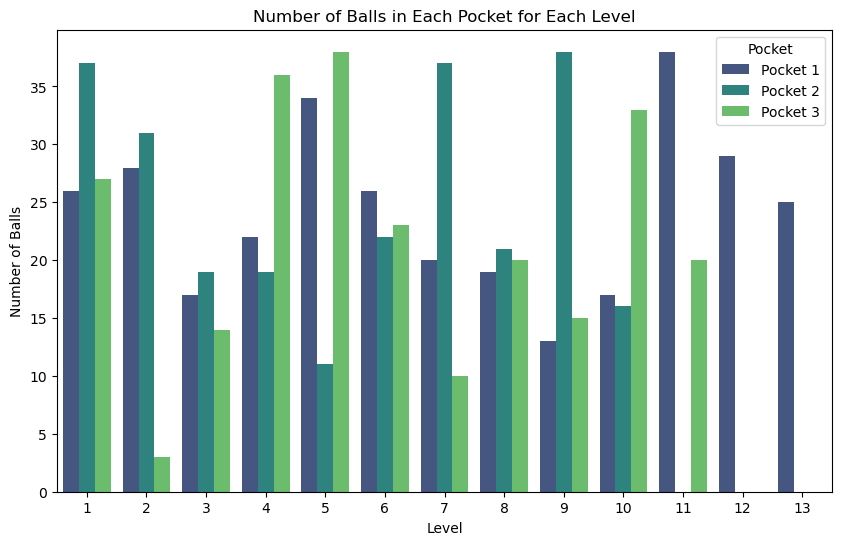

In [11]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.title('Number of Balls in Each Pocket for Each Level')
sns.barplot(x='currentLevel', y='Number of Balls', hue='Pocket', data=melted_pockets, palette='viridis')
plt.xlabel('Level')
plt.ylabel('Number of Balls')
plt.show()